In [40]:
# import dependencies

import numpy as np
import pandas as pd
import os, warnings
from pathlib import Path

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt

In [41]:
# Import the data

myopiaDF= pd.read_csv("resources/myopia.csv")
myopiaDF.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [42]:
# print out info about dataframe
myopiaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [43]:
# basic statistics 
myopiaDF.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000


In [44]:
# Remove the "MYOPIC" column from the dataset.
myopiaDF.drop(columns= "MYOPIC", inplace = True)


In [45]:
myopiaDF

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [46]:
# scale the data 
scaler = StandardScaler()
scaledData = scaler.fit_transform(myopiaDF)

In [48]:
# display scaled data
scaledData[:5]

array([[-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
        -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
         0.18405806,  0.49830393,  0.98713773,  1.0032415 ],
       [-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
        -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
        -0.34093217, -0.87508755,  0.98713773,  1.0032415 ],
       [-0.42021911,  0.60438629, -0.00997682, -0.5066285 , -0.17781207,
         0.21580879,  0.25709181, -0.91206246, -0.03443904, -0.67299591,
         0.18405806, -0.75023378, -1.01302987, -0.99676897],
       [-0.42021911, -0.4413248 , -0.43670267,  1.23093648,  0.4569273 ,
        -0.97458715,  0.75948782,  2.6760166 , -0.68931054, -0.67299591,
        -0.86592239,  0.68558458, -1.01302987,  1.0032415 ],
       [-1.82397807, -0.16630592,  1.16720365,  0.42296952, -0.56642745,
         1.18017813,  0.25709181, -0.91206246, -0.68931054, -0.67299591,
        -0.86592239, -1.37

## Part 2: Apply Dimensionality Reduction

In [50]:
# Part 2: Apply Dimensionality Reduction

pca = PCA(n_components=0.90)
pcaTransformedData = pca.fit_transform(scaledData)

In [52]:
# display transformed Data
pcaTransformedData

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [53]:
# Trasform PCA data to a dataframe
myopiaPcaDf = pd.DataFrame(data=pcaTransformedData)
myopiaPcaDf.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [54]:
# Explained Variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [60]:
# display shape of features after reduction
pcaTransformedData.shape

(618, 10)

In [62]:
# run t-SNE 

tsne = TSNE(learning_rate=250)
transformedFeatures = tsne.fit_transform(pcaTransformedData)

/Users/trell/.pyenv/versions/3.9.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [64]:
# add feature and target columns
myopiaPcaDf["x"] = transformed_features[:,0]
myopiaPcaDf["y"] = transformed_features[:,1]


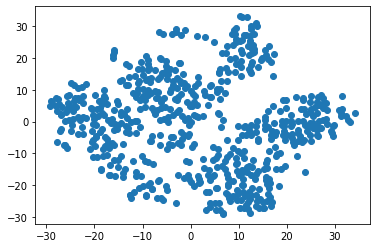

In [66]:
# Visualize the data
myopiaPcaDf["x"] = transformed_features[:,0]
myopiaPcaDf["y"] = transformed_features[:,1]
plt.scatter(myopiaPcaDf["x"], myopiaPcaDf["y"])
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

In [68]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopiaPcaDf)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbowData = {"k": k, "inertia": inertia}
elbowDF = pd.DataFrame(elbowData)
elbowDF.head()

/Users/trell/.pyenv/versions/3.9.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/trell/.pyenv/versions/3.9.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/trell/.pyenv/versions/3.9.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/trell/.pyenv/versions/3.9.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'

,k,inertia
0,1,279841.822841
1,2,162030.409066
2,3,102847.701350
3,4,69768.001520
4,5,53365.468476


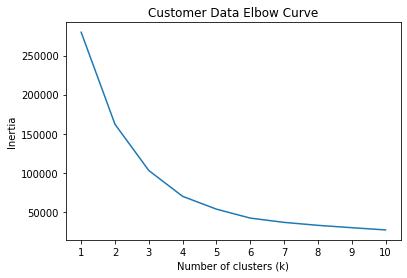

In [70]:
# Visualize data to show best candidate(s) for k
plt.plot(elbowDF['k'], elbowDF['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Customer Data Elbow Curve')

plt.show()

# Recommendation

My recommendendation is group patients into 5 clusters to avoid overfitting as the elbow curve begins to flatten after 5.